# 1.) Problem Statement definition and basic metrics analysis

The dataset is of a fitness based company "Aerofit". The data given indicates the details about different threadmils offered by the company.
* Problem Statement definition: The data can be used to derive insights to find out which threadmill would cater to which group of users.
 Also, we want to find out if there are differences across the product with respect to customer characteristics.

 Let's now move forward to have a look at the data, and analyse the basic metrics. 
 Later we want to 
 1.) Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
 2.)For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


In [589]:
#Importing Necessary libraries (We will keep on importing libraries in this cell)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [590]:
#statistical summary
Aerofit_tm_data= pd.read_csv('aerofit_treadmill.csv')
Aerofit_data_original = pd.read_csv('aerofit_treadmill.csv')
# Shape -> Rows,columns
print('Shape of the data set is as follows: ')
print('No. of Rows: '+ str(Aerofit_tm_data.shape[0]))
print('No. of Columns: '+ str(Aerofit_tm_data.shape[1]))
print('-------------------------------------------')


Shape of the data set is as follows: 
No. of Rows: 180
No. of Columns: 9
-------------------------------------------


In [591]:
# Finding out the basic info 
print(Aerofit_tm_data.info())
print('-------------------------------------------')

# Describing each feature, by listing out the basic metrics

Aerofit_tm_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None
-------------------------------------------


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# 2.) Non-Graphical Analysis: Value counts and unique attributes

In [592]:
# Unique attributes 
print("Product:  "+ str(Aerofit_tm_data['Product'].value_counts().nunique()) )
print("Age: "+str(Aerofit_tm_data['Age'].value_counts().nunique()))
print("Gender: "+str(Aerofit_tm_data['Gender'].value_counts().nunique()))
print("Education: "+str(Aerofit_tm_data['Education'].value_counts().nunique()))
print("MaritalStatus: "+str(Aerofit_tm_data['MaritalStatus'].value_counts().nunique()))
print("Usage: "+str(Aerofit_tm_data['Usage'].value_counts().nunique()))
print("Fitness: "+str(Aerofit_tm_data['Fitness'].value_counts().nunique()))
print("Income: "+str(Aerofit_tm_data['Income'].value_counts().nunique()))
print("Miles: "+str(Aerofit_tm_data['Miles'].value_counts().nunique()))


print("-------------------------")




Product:  3
Age: 11
Gender: 2
Education: 6
MaritalStatus: 2
Usage: 6
Fitness: 5
Income: 10
Miles: 12
-------------------------


In [593]:
#Value counts of each categorical attributes having 5 or less categories based on the above unique value counts

print("Product grouped count stats: ")
print(Aerofit_tm_data['Product'].value_counts().to_frame().reset_index())
print("-------------------------")

print("Gender grouped count stats: ")
print(Aerofit_tm_data['Gender'].value_counts().to_frame().reset_index())
print("-------------------------")


print("MaritalStatus grouped count stats: ")
print(Aerofit_tm_data['MaritalStatus'].value_counts().to_frame().reset_index())
print("-------------------------")


print("Usage grouped count stats: ")
print(Aerofit_tm_data['Usage'].value_counts().to_frame().reset_index())
print("-------------------------")






Product grouped count stats: 
  Product  count
0   KP281     80
1   KP481     60
2   KP781     40
-------------------------
Gender grouped count stats: 
   Gender  count
0    Male    104
1  Female     76
-------------------------
MaritalStatus grouped count stats: 
  MaritalStatus  count
0     Partnered    107
1        Single     73
-------------------------
Usage grouped count stats: 
   Usage  count
0      3     69
1      4     52
2      2     33
3      5     17
4      6      7
5      7      2
-------------------------


In [594]:
print("Fitness grouped count stats: ")
print(Aerofit_tm_data['Fitness'].value_counts().to_frame().reset_index())
print("-------------------------")



Fitness grouped count stats: 
   Fitness  count
0        3     97
1        5     31
2        2     26
3        4     24
4        1      2
-------------------------



Observations on the following -
----
1. Shape of data: 
    
    * No. of Columns: 9, No. of Rows: 180
        *   Column observations
            * There are only three kind of products as seen in the column "Product" (unique values in column Product is 3)
            * With respect to gennfer we notice there are more males using the threadmill than females
            * More parented using threadmill more than single people
        * --
        *   Row observations
            * No column has null values
            * Imputation not necessary
----
2. Data type of all attributes
    * Education , age, usage,fitness,income and miles has int64 (integer) datatype , while the rest are objects. 

----
3. Conversion of categorical attributes to 'category'  (Information derived from .describe )
    * Categorical attributes in this data are: 
       
        * Product -> nunique value is 3 for this column
        * Gender -> nunique value is 2 
        * Marital status -> Can be categorized to 2 unique status
        * Usage -> Can be categorized to 6 values
        * Fitness -> Can be categorized to 5 categories
----
4. missing value detection
    * Columns, which have missing or null values are: None




# 3.) Visual Analysis - Univariate & Bivariate 
## 3.1) For continuous variable(s): Distplot, countplot, histogram for univariate analysis
### Univariate analysis : Countplot


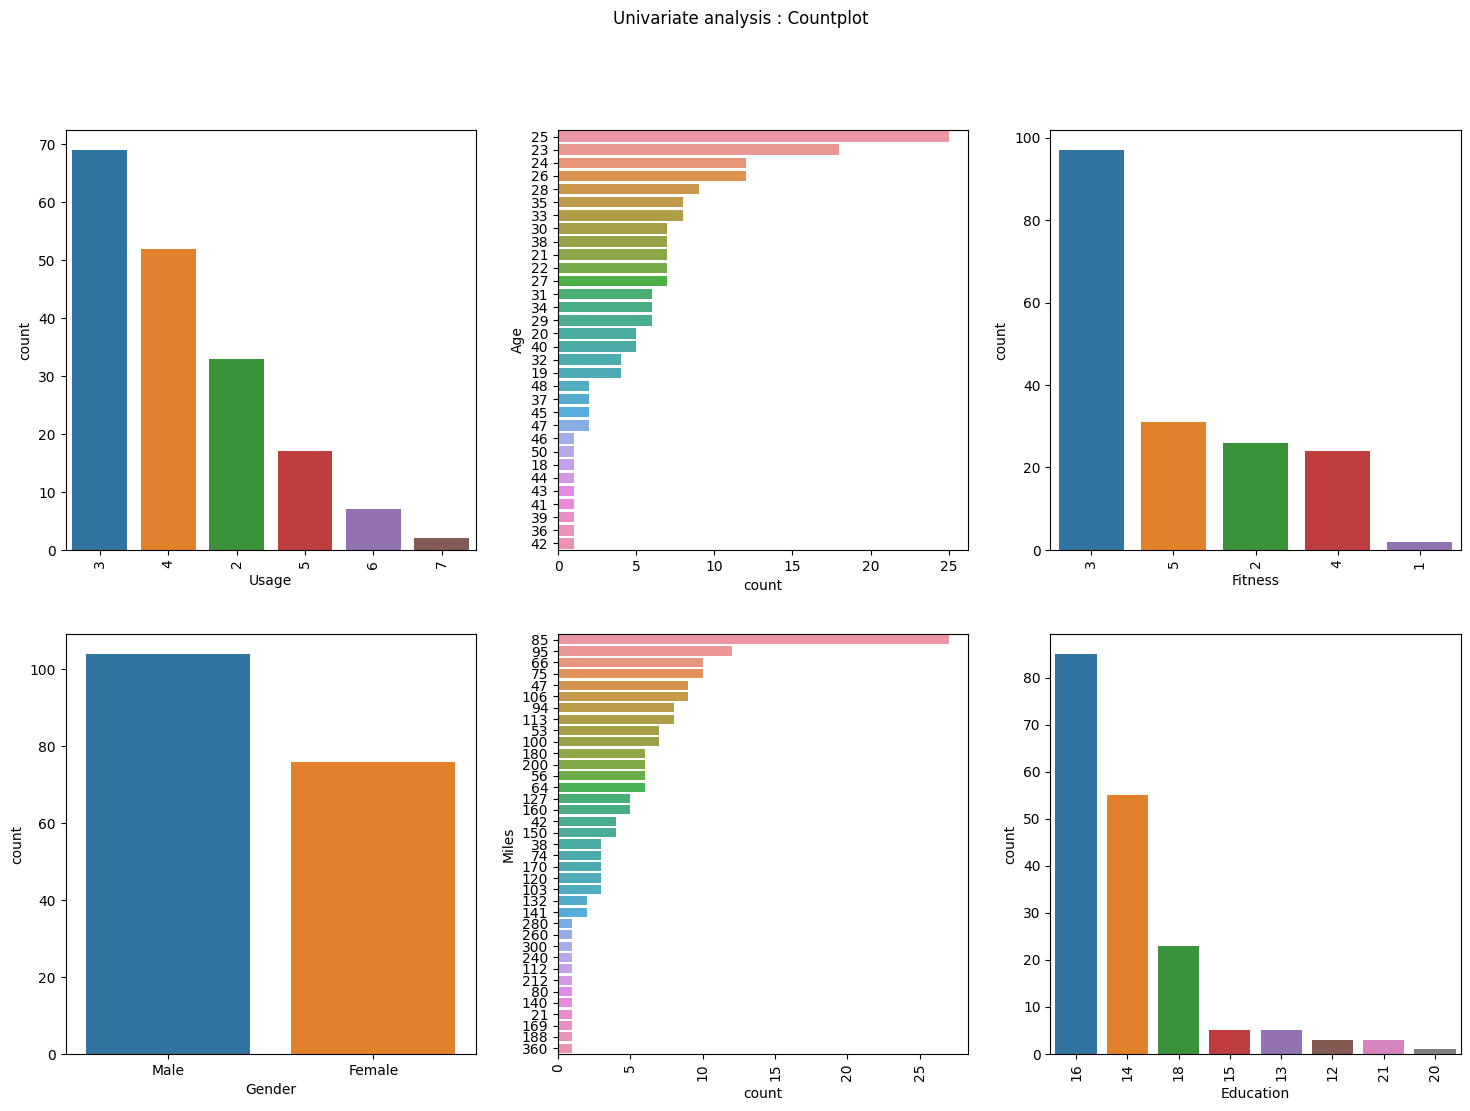

In [595]:
fig= plt.figure(figsize=(18,12))
fig.suptitle("Univariate analysis : Countplot")
plt.subplot(2,3,1)

#Usage
sns.countplot(data=Aerofit_tm_data,
              x="Usage",order = Aerofit_tm_data['Usage'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

#Age
plt.subplot(2,3,2)
sns.countplot(data=Aerofit_tm_data,
              y="Age",order = Aerofit_tm_data['Age'].value_counts(ascending=False).index,orient='h')
plt.subplot(2,3,3)

#Fitness
sns.countplot(data=Aerofit_tm_data,
              x="Fitness",order = Aerofit_tm_data['Fitness'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

#Gender
plt.subplot(2,3,4)
sns.countplot(data=Aerofit_tm_data,
              x="Gender",order = Aerofit_tm_data['Gender'].value_counts(ascending=False).index)

# MILES
plt.subplot(2,3,5)
sns.countplot(data=Aerofit_tm_data,
              y="Miles",order = Aerofit_tm_data['Miles'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

#Education
plt.subplot(2,3,6)
sns.countplot(data=Aerofit_tm_data,
              x="Education",order = Aerofit_tm_data['Education'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

plt.show()


# Observations: 
* The number of times most customer plan to use the treadmill is 3 per week
* Age 25 wants to buy a threadmil the most
* Most rate themselves 3 in fitness, very few rate 1
* More males want to buy threadmills than females
* The number of miles the customer expects to walk/run each week is mostly 85 for most people 
* The customers having educational years  14,16,18 want to buy a threadmil the most, others rarely buy.

### Univariate analysis: displots and hist plots

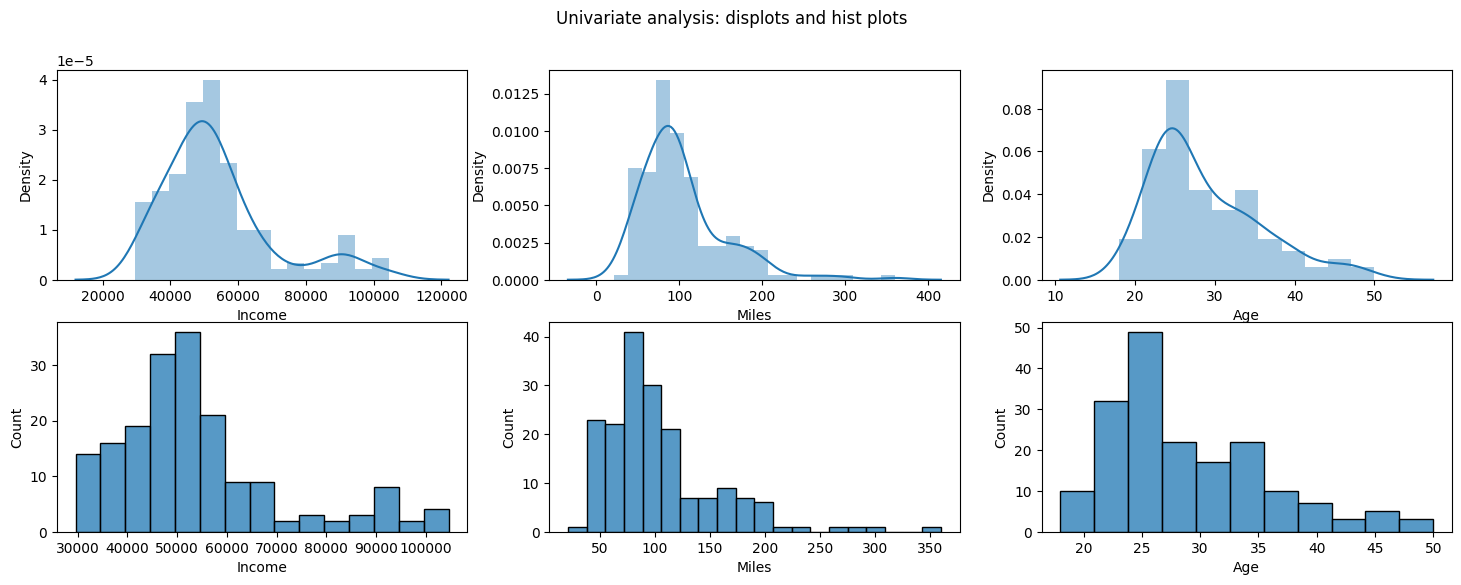

In [596]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Univariate analysis: displots and hist plots")
plt.subplot(2,3,1)

sns.distplot(Aerofit_tm_data["Income"])

plt.subplot(2,3,2)
sns.distplot(Aerofit_tm_data["Miles"])

plt.subplot(2,3,3)
sns.distplot(Aerofit_tm_data["Age"])

plt.subplot(2,3,4)

sns.histplot(Aerofit_tm_data["Income"])

plt.subplot(2,3,5)
sns.histplot(Aerofit_tm_data["Miles"])

plt.subplot(2,3,6)
sns.histplot(Aerofit_tm_data["Age"])
plt.show()

 # Observations: 
* The income where most people lie (higest denisty)appears to be between 35k and 60k dollars
* The miles most people expect to log is between 50 to 110
* Age 22-35 is the most intrested to get a threadmill

### Bivariate analysis 

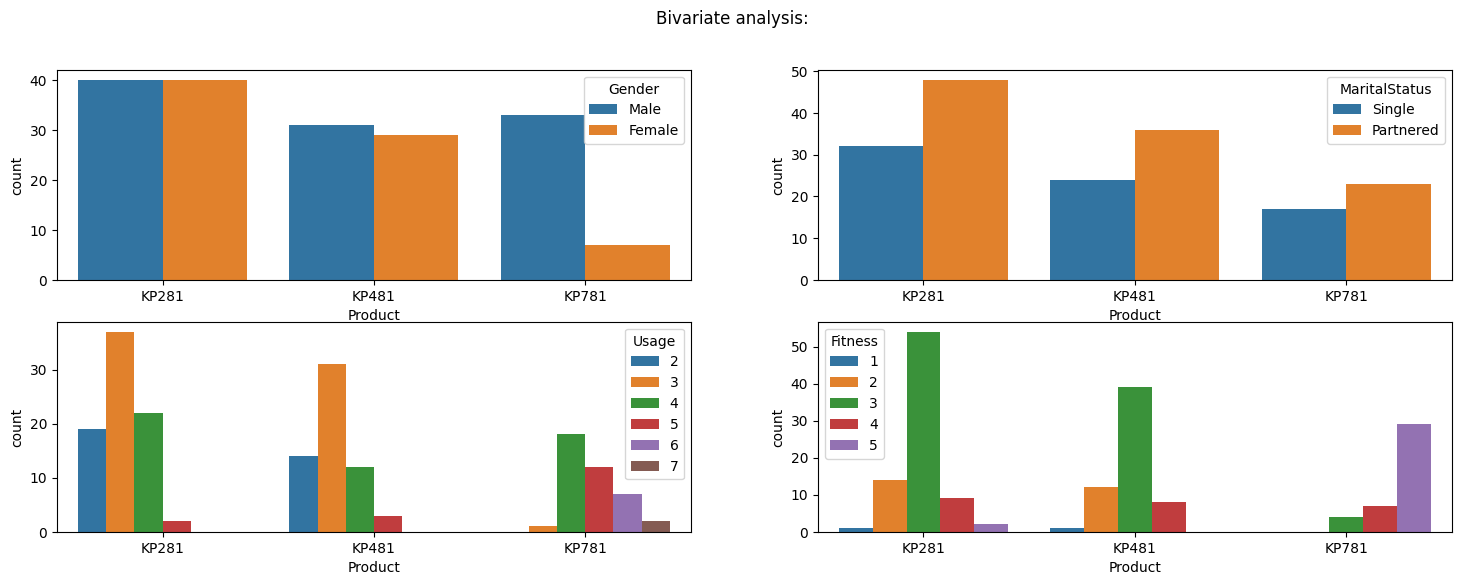

In [597]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Bivariate analysis:")
plt.subplot(2,2,1)

sns.countplot(x = 'Product', data = Aerofit_tm_data, hue = 'Gender')
plt.subplot(2,2,2)
sns.countplot(x = 'Product', data = Aerofit_tm_data, hue = 'MaritalStatus')

plt.subplot(2,2,3)
sns.countplot(x = 'Product', data = Aerofit_tm_data, hue = 'Usage')

plt.subplot(2,2,4)
sns.countplot(x = 'Product', data = Aerofit_tm_data, hue = 'Fitness')

plt.show()

# Observations
* There are more partnered people buying a threadmill more than singles
* KP781 have people who plan on using it all 7 days of the week
* KP781 is considered by males more than females

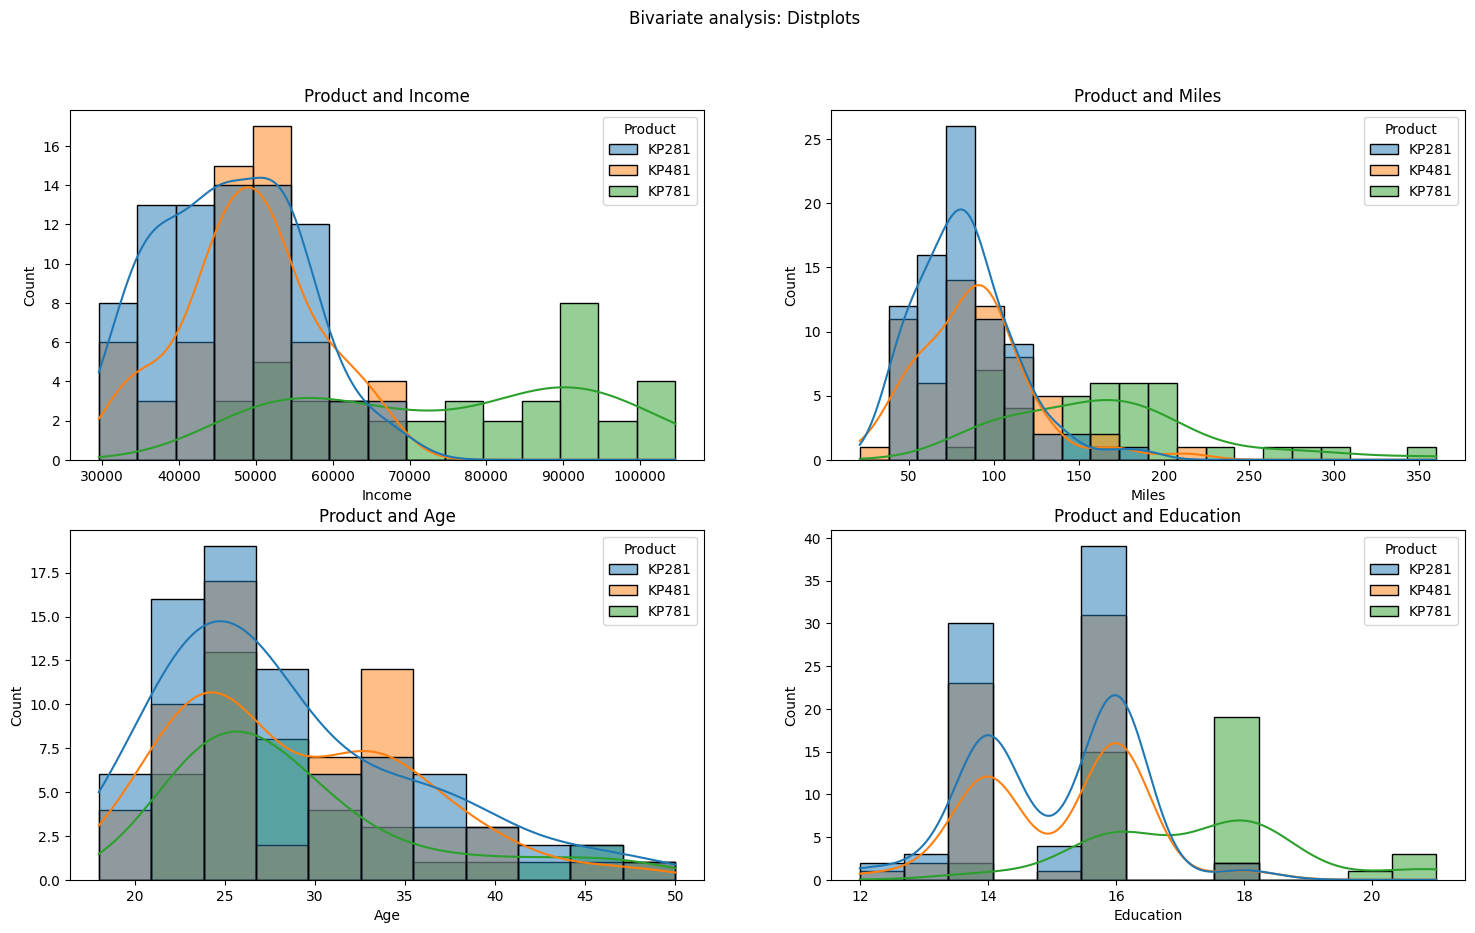

In [598]:
fig= plt.figure(figsize=(18,10))
fig.suptitle("Bivariate analysis: Distplots")
plt.subplot(2,2,1)
# histogram based on income
sns.histplot(data=Aerofit_tm_data, x="Income", hue="Product", kde = True)
plt.title("Product and Income")

plt.subplot(2,2,2)
# histogram based on income
sns.histplot(data=Aerofit_tm_data, x="Miles", hue="Product", kde = True)
plt.title("Product and Miles")

plt.subplot(2,2,3)
# histogram based on income
sns.histplot(data=Aerofit_tm_data, x="Age", hue="Product", kde = True)
plt.title("Product and Age")


plt.subplot(2,2,4)
# histogram based on income
sns.histplot(data=Aerofit_tm_data, x="Education", hue="Product", kde = True)
plt.title("Product and Education")




plt.show()

# Observations
* People with income greater than 70000 only prefer KP781
* People having an income of 45000 to 75000 prefer KP481 and KP281 with slightly higer prefrence for KP481
* People around the age 22-28 buy threadmills the most
* Education around 14-16 years mostly buy KP281 whereas with 18 years of education people opt for KP781

<Axes: xlabel='Age', ylabel='Income'>

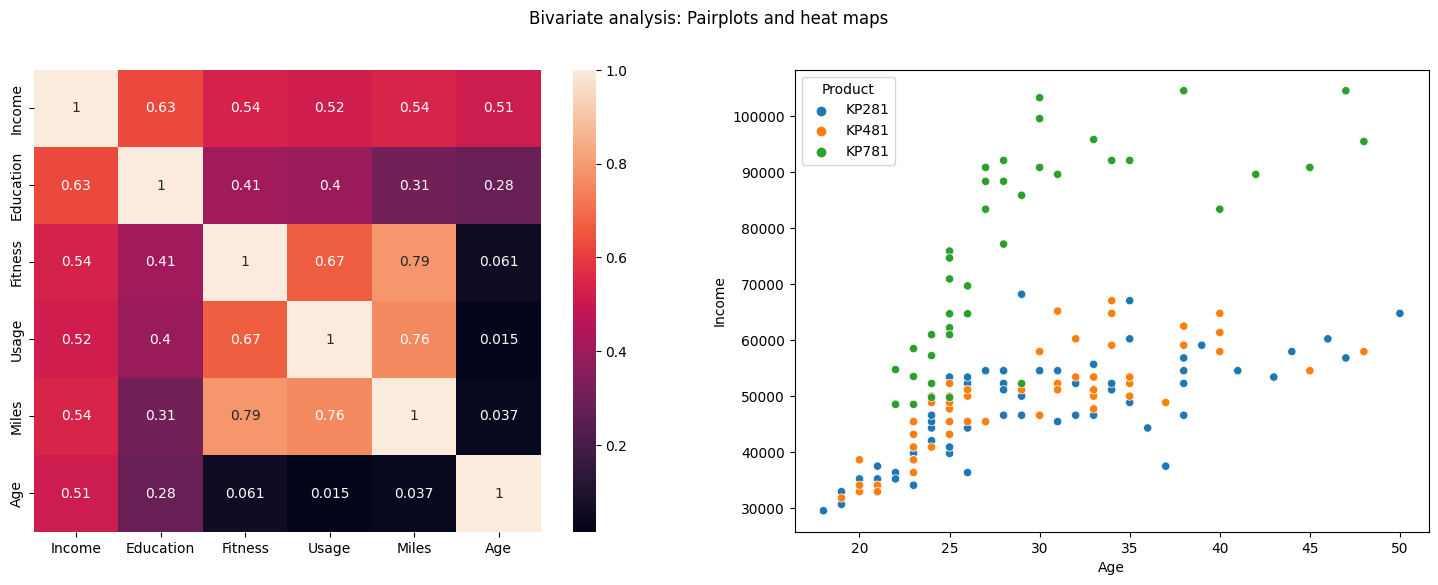

In [599]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Bivariate analysis: Pairplots and heat maps")
# Customer Profiling - Categorization of users.
plt.subplot(1,2,1)
sns.heatmap(Aerofit_tm_data[['Income','Education','Fitness','Usage','Miles','Age']].corr(), annot=True)
plt.subplot(1,2,2)
# scatter plot age and income
sns.scatterplot(y = 'Income', x = 'Age', data = Aerofit_tm_data, hue = 'Product')


# Observations:
* As we see miles fitness are highly corellated. People who exoect to use the threadmill more are fit and plan to log more miles.
* Education years have the least correlation with usage
* Usage and fitness are not correlated. A less fit might use th threadmill more than highly fit person too
* age has no correlation with fitness,usage and miles
* More income people buy KP781 only as the income increases it is more prominent

## Box plots and outlier detection

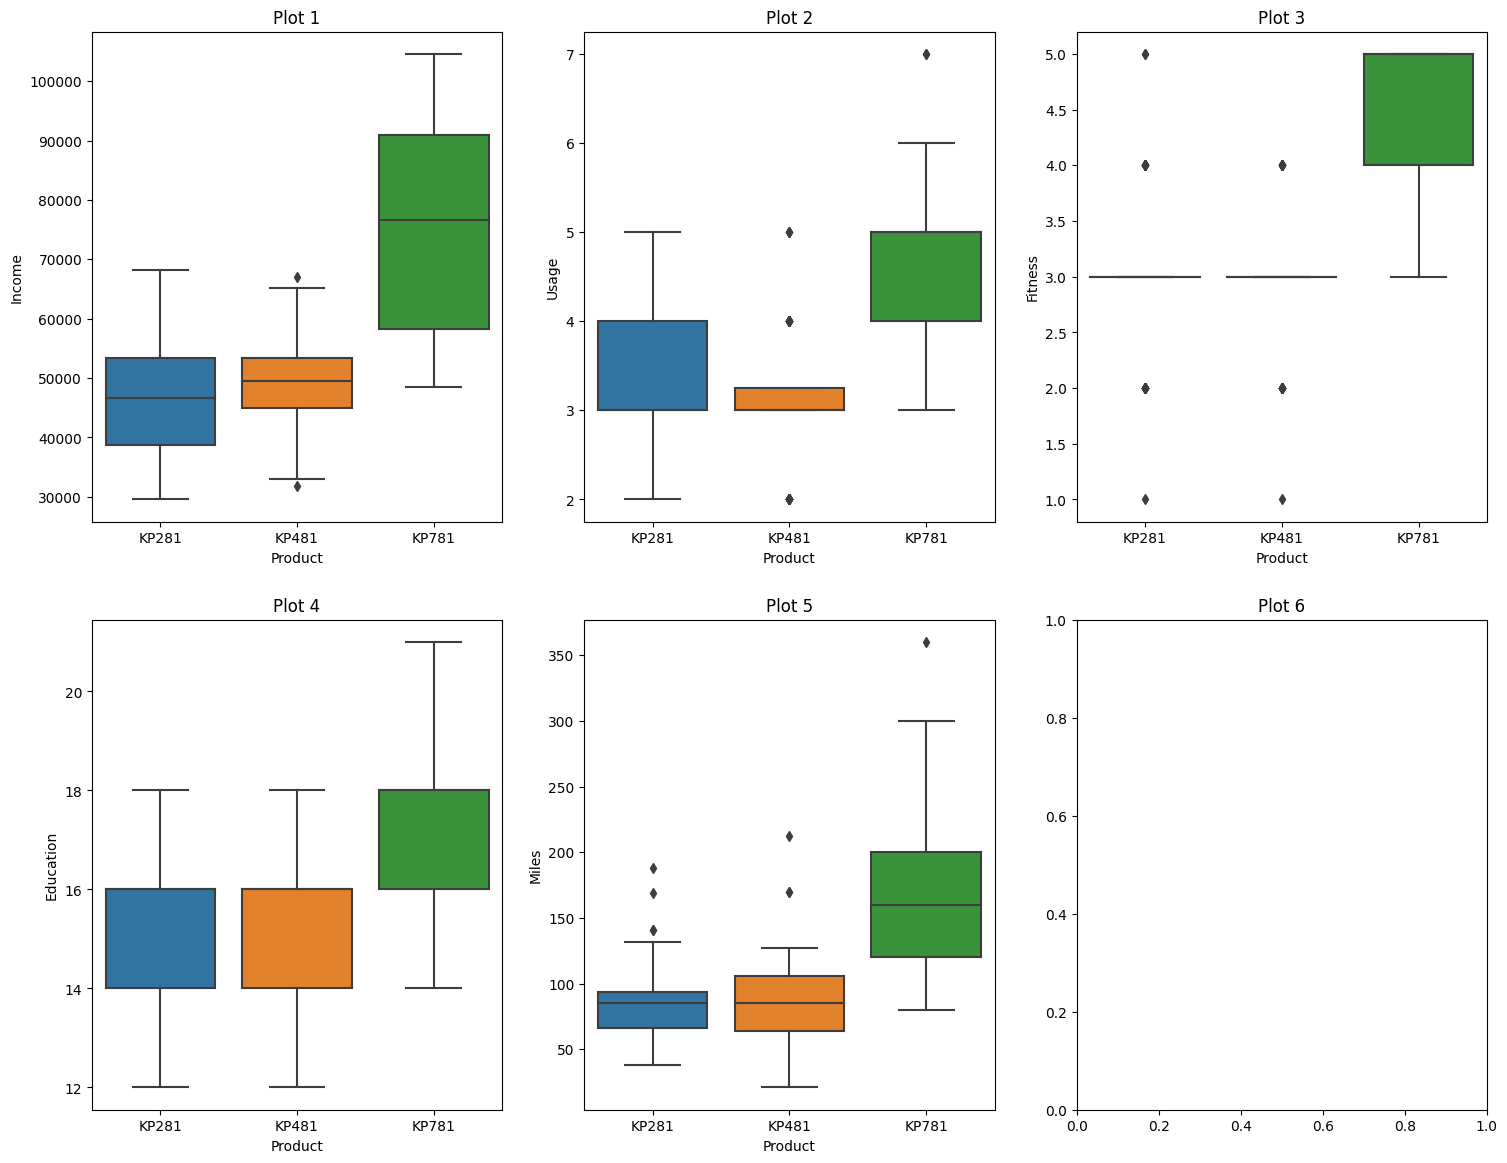

In [600]:
#For categorical variable(s): Boxplot (10 Points)
fig= plt.figure(figsize=(18,14))
# Age vs Miles
plt.subplot(2,3,1)
plt.subplot(2,3,1).set_title("Plot 1")
sns.boxplot(data=Aerofit_tm_data,x="Product",y="Income")
plt.subplot(2,3,2).set_title("Plot 2")
sns.boxplot(data=Aerofit_tm_data,x="Product",y="Usage")
plt.subplot(2,3,3).set_title("Plot 3")
sns.boxplot(data=Aerofit_tm_data,x="Product",y="Fitness")
plt.subplot(2,3,4).set_title("Plot 4")
sns.boxplot(data=Aerofit_tm_data,x="Product",y="Education")
plt.subplot(2,3,5).set_title("Plot 5")
sns.boxplot(data=Aerofit_tm_data,x="Product",y="Miles")
plt.subplot(2,3,6).set_title("Plot 6")
#sns.boxplot(data=Aerofit_tm_data,x="Gender",y="Marital")
plt.show()

In [601]:

# Outliers wrt activity grouped by threadmill models
print("People who bought KP281 (Plan to log more miles than usual miles of people who buy the same model)")
display(Aerofit_tm_data[(Aerofit_tm_data['Product'] == 'KP281') & (Aerofit_tm_data['Miles'] > 150)])

print("People who bought KP481 (Plan to log more miles than usual miles of people who buy the same model)")
display(Aerofit_tm_data[(Aerofit_tm_data['Product'] == 'KP481') & (Aerofit_tm_data['Miles'] > 150)])

print("People who bought KP481 (Plan to log more miles than usual miles of people who buy the same model)")
display(Aerofit_tm_data[(Aerofit_tm_data['Product'] == 'KP781') & (Aerofit_tm_data['Miles'] > 300)])

print("People who bought KP481 and have the least fitness")
display(Aerofit_tm_data[(Aerofit_tm_data['Product'] == 'KP481') & (Aerofit_tm_data['Fitness'] < 2)])


People who bought KP281 (Plan to log more miles than usual miles of people who buy the same model)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
61,KP281,34,Male,16,Single,4,5,51165,169


People who bought KP481 (Plan to log more miles than usual miles of people who buy the same model)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,KP481,21,Female,14,Partnered,5,4,34110,212
103,KP481,25,Male,14,Partnered,4,3,45480,170
120,KP481,33,Male,13,Partnered,4,4,53439,170


People who bought KP481 (Plan to log more miles than usual miles of people who buy the same model)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
173,KP781,35,Male,16,Partnered,4,5,92131,360


People who bought KP481 and have the least fitness


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
117,KP481,31,Female,18,Single,2,1,65220,21


# Observation
Few outliers are listed above:
* As we see these are promimnet ina box plot and we got the values to check through them
* They defienetly diverege a lot fromt the mean and for a dot and the ends of the wiskhers

## Customer Profiling - Categorization of users.
### Marginal and conditional probabilities included

### From the bivariate analysis we can see that the users can actually be categorized into few Secions throgh each of the following columns
1. Miles - People aming to log certain amount of miles can be categorized into and grouped by the model selected:
    * Active
    * Non Active
2. Income
    * Rich 
    * Below Average
3. Fitness
    * Extremely fit
    * Fit enough
    * Not Fit
4. Usage 
    * Consistent
    * Inconsistent

### Average vales and customer profiling based on them:

In [602]:
avg_miles = Aerofit_tm_data["Miles"].mean() 
print("Average miles:" + str(avg_miles))

avg_income = Aerofit_tm_data["Income"].mean() 
print("Average Income:" +str(avg_income))

avg_fitness = Aerofit_tm_data["Fitness"].mean() 
print("Average Fitness:" +str(avg_fitness))

avg_usage= Aerofit_tm_data["Usage"].mean() 
print("Average Usage:" +str(avg_usage))
# Min to 25th percentile -> Poor
income_25_percentile = Aerofit_tm_data["Income"].describe()["25%"]
# 25th percentile to 75% -> Middle class
income_75_percentile = Aerofit_tm_data["Income"].describe()["75%"]
# Greater than 75% -> Rick
print("25%","75%")
print(income_25_percentile,income_75_percentile)


Average miles:103.19444444444444
Average Income:53719.57777777778
Average Fitness:3.311111111111111
Average Usage:3.4555555555555557
25% 75%
44058.75 58668.0


In [603]:
# Miles >=100 miles or Miles < 100 miles
Aerofit_tm_data.loc[Aerofit_tm_data["Miles"]>=100,'Miles_Activity'] = 'Active'
Aerofit_tm_data.loc[Aerofit_tm_data["Miles"]<100,'Miles_Activity'] = 'Non Active'

### Income (Rich vs poor)
Aerofit_tm_data.loc[Aerofit_tm_data["Income"]>income_75_percentile,'Income_status'] = 'Rich'
Aerofit_tm_data.loc[(Aerofit_tm_data["Income"]<income_75_percentile) & (Aerofit_tm_data["Income"]>income_25_percentile),'Income_status'] = 'Middle Class'
Aerofit_tm_data.loc[(Aerofit_tm_data["Income"]<income_25_percentile),'Income_status'] = 'Poor'


### Fitness (Extremely Fit vs Fit Enough vs Not Fit)
Aerofit_tm_data.loc[Aerofit_tm_data["Fitness"]>=4,'Fitness_level'] = 'Extremely Fit'
Aerofit_tm_data.loc[(Aerofit_tm_data["Fitness"]>=3) & (Aerofit_tm_data["Fitness"]<4),'Fitness_level'] = 'Fit'
Aerofit_tm_data.loc[(Aerofit_tm_data["Fitness"]<3) ,'Fitness_level'] = 'Not Fit'

### Usage (Consistent vs Inconsistent)
Aerofit_tm_data.loc[Aerofit_tm_data["Usage"]>3,'Consistency'] = 'Consistent'
Aerofit_tm_data.loc[Aerofit_tm_data["Usage"]<=3,'Consistency'] = 'Inconsistent'



# Fitness Level

<Axes: xlabel='count', ylabel='Product'>

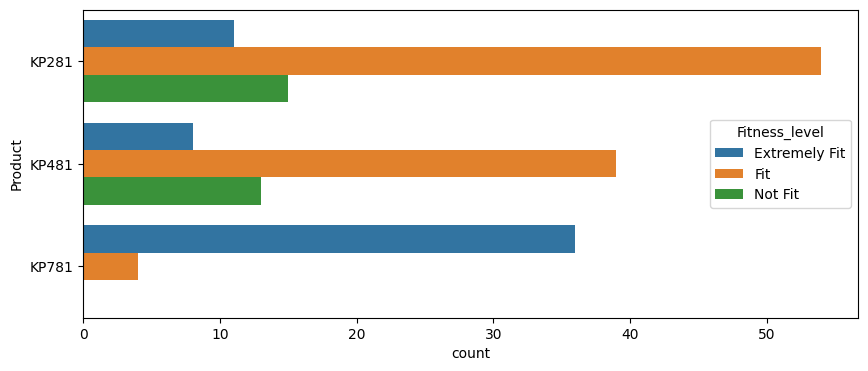

In [604]:
fig= plt.figure(figsize=(10,4))
df_plot= Aerofit_tm_data.groupby(['Fitness_level','Product'])["Product"].value_counts().reset_index()
df_plot
sns.barplot(x = df_plot["count"], y = df_plot["Product"] ,hue=df_plot["Fitness_level"])

In [605]:
# Marginal probability
print("Marginal Probablity" )
Marginal_probability = pd.crosstab(
    Aerofit_tm_data['Fitness_level'], 
    Aerofit_tm_data['Product'], 
    rownames=['Fitness_level'], 
    colnames=['Products'],
    normalize=True,
    margins=True
    
).style.format('{:.2%}')
display(Marginal_probability)

# Conditional probability
print("Conditional Probablity: P(Fitness_level|Product)" )
Fitness_given_product= pd.crosstab(
    Aerofit_tm_data['Fitness_level'], 
    Aerofit_tm_data['Product'], 
    rownames=['Fitness_level'], 
    colnames=['Products'],
    normalize='columns',
).style.format('{:.2%}')
display(Fitness_given_product)
print("Conditional Probablity: P(Product|Fitness_level)" )
Fitness_given_Fitness=pd.crosstab(
    Aerofit_tm_data['Fitness_level'], 
    Aerofit_tm_data['Product'], 
    rownames=['Fitness_level'], 
    colnames=['Products'],
    normalize='index',

).style.format('{:.2%}')
display(Fitness_given_Fitness)


Marginal Probablity


Products,KP281,KP481,KP781,All
Fitness_level,,,,
Extremely Fit,6.11%,4.44%,20.00%,30.56%
Fit,30.00%,21.67%,2.22%,53.89%
Not Fit,8.33%,7.22%,0.00%,15.56%
All,44.44%,33.33%,22.22%,100.00%


Conditional Probablity: P(Fitness_level|Product)


Products,KP281,KP481,KP781
Fitness_level,,,
Extremely Fit,13.75%,13.33%,90.00%
Fit,67.50%,65.00%,10.00%
Not Fit,18.75%,21.67%,0.00%


Conditional Probablity: P(Product|Fitness_level)


Products,KP281,KP481,KP781
Fitness_level,,,
Extremely Fit,20.00%,14.55%,65.45%
Fit,55.67%,40.21%,4.12%
Not Fit,53.57%,46.43%,0.00%


#### Observation
* People with low or poor fitness only prefer 'KP281' and 'KP481' models (53.57% and 40.21% ) respectively
* People with low or poor fitness don't even consider the other expensive option like ('KP781')
* People with high fitness prefer 'KP781' model the most as compared to non fit and just fit people. (65.45%) 
* 'KP281','KP481' seems to be a popular model among people who rate themselves to moderately Fit or Not fit.

# Income status

<Axes: xlabel='count', ylabel='Product'>

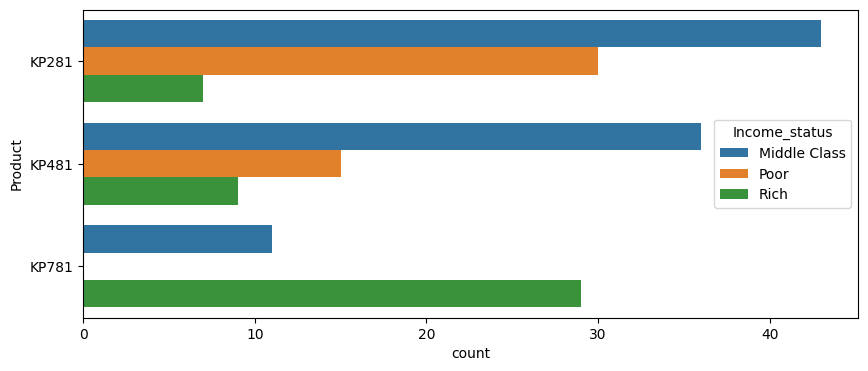

In [606]:
fig= plt.figure(figsize=(10,4))
df_plot= Aerofit_tm_data.groupby(['Income_status','Product'])["Product"].value_counts().reset_index()
df_plot
sns.barplot(x = df_plot["count"], y = df_plot["Product"] ,hue=df_plot["Income_status"])

In [607]:
# Marginal probability
print("Marginal Probablity" )
Marginal_probability = pd.crosstab(
    Aerofit_tm_data['Income_status'], 
    Aerofit_tm_data['Product'], 
    rownames=['Income_status'], 
    colnames=['Products'],
    normalize=True,
    margins=True
    
).style.format('{:.2%}')
display(Marginal_probability)

# Conditional probability
print("Conditional Probablity: P(Income_status|Product)" )
Income_given_product= pd.crosstab(
    Aerofit_tm_data['Income_status'], 
    Aerofit_tm_data['Product'], 
    rownames=['Income_status'], 
    colnames=['Products'],
    normalize='columns',
).style.format('{:.2%}')
display(Income_given_product)
print("Conditional Probablity: P(Product|Income_status)" )
Product_given_income=pd.crosstab(
    Aerofit_tm_data['Income_status'], 
    Aerofit_tm_data['Product'], 
    rownames=['Income_status'], 
    colnames=['Products'],
    normalize='index',

).style.format('{:.2%}')
display(Product_given_income)


Marginal Probablity


Products,KP281,KP481,KP781,All
Income_status,,,,
Middle Class,23.89%,20.00%,6.11%,50.00%
Poor,16.67%,8.33%,0.00%,25.00%
Rich,3.89%,5.00%,16.11%,25.00%
All,44.44%,33.33%,22.22%,100.00%


Conditional Probablity: P(Income_status|Product)


Products,KP281,KP481,KP781
Income_status,,,
Middle Class,53.75%,60.00%,27.50%
Poor,37.50%,25.00%,0.00%
Rich,8.75%,15.00%,72.50%


Conditional Probablity: P(Product|Income_status)


Products,KP281,KP481,KP781
Income_status,,,
Middle Class,47.78%,40.00%,12.22%
Poor,66.67%,33.33%,0.00%
Rich,15.56%,20.00%,64.44%


### Observation:
* People who are rich go for 'KP781' more than other to Income_Status people (64% of the Rich population)
* Middle class opt for all 3 products but prefer "KP281" and "KP481" more (87.8% of the middle class population prefer these 2 products)
* Poor class usually opt for "KP281" the most and also "KP481" sometimes (66% and 33.3%) respectively.
* Poor class never opt for "KP781" 

# Miles Activity

<Axes: xlabel='count', ylabel='Product'>

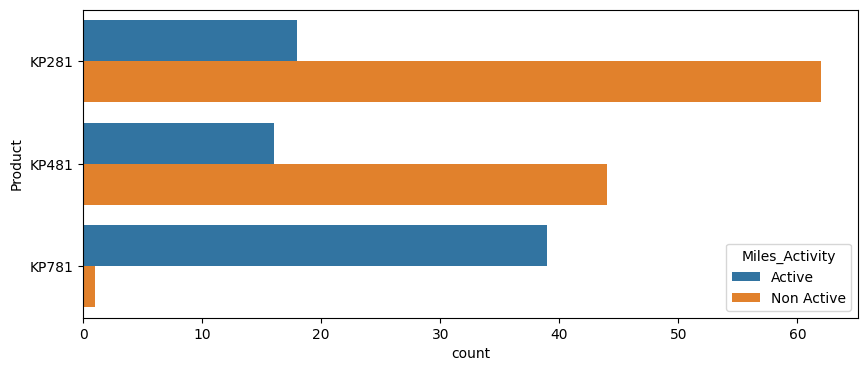

In [608]:
fig= plt.figure(figsize=(10,4))
df_plot= Aerofit_tm_data.groupby(['Miles_Activity','Product'])["Product"].value_counts().reset_index()
df_plot
sns.barplot(x = df_plot["count"], y = df_plot["Product"] ,hue=df_plot["Miles_Activity"])

In [609]:
# Marginal probability
print("Marginal Probablity" )
Marginal_probability = pd.crosstab(
    Aerofit_tm_data['Miles_Activity'], 
    Aerofit_tm_data['Product'], 
    rownames=['Miles_Activity'], 
    colnames=['Products'],
    normalize=True,
    margins=True
    
).style.format('{:.2%}')
display(Marginal_probability)

# Conditional probability
print("Conditional Probablity: P(Miles_Activity|Product)" )
Activity_given_product= pd.crosstab(
    Aerofit_tm_data['Miles_Activity'], 
    Aerofit_tm_data['Product'], 
    rownames=['Miles_Activity'], 
    colnames=['Products'],
    normalize='columns',
).style.format('{:.2%}')
display(Activity_given_product)
print("Conditional Probablity: P(Product|Miles_Activity)" )
Product_given_activity=pd.crosstab(
    Aerofit_tm_data['Miles_Activity'], 
    Aerofit_tm_data['Product'], 
    rownames=['Miles_Activity'], 
    colnames=['Products'],
    normalize='index',

).style.format('{:.2%}')
display(Product_given_activity)


Marginal Probablity


Products,KP281,KP481,KP781,All
Miles_Activity,,,,
Active,10.00%,8.89%,21.67%,40.56%
Non Active,34.44%,24.44%,0.56%,59.44%
All,44.44%,33.33%,22.22%,100.00%


Conditional Probablity: P(Miles_Activity|Product)


Products,KP281,KP481,KP781
Miles_Activity,,,
Active,22.50%,26.67%,97.50%
Non Active,77.50%,73.33%,2.50%


Conditional Probablity: P(Product|Miles_Activity)


Products,KP281,KP481,KP781
Miles_Activity,,,
Active,24.66%,21.92%,53.42%
Non Active,57.94%,41.12%,0.93%


### Observations:
* Non active people almost never opt for "KP781" 
* "Active" people are ready to invest more and buy "KP781" (From P(Product|Miles_Activity))
* "KP781" product is mostly bought by Active people (From P(Miles_Activity|Product))
* KP281 still stands to be the most preffered option among Non active people followed by KP481

# Consistency

<Axes: xlabel='count', ylabel='Product'>

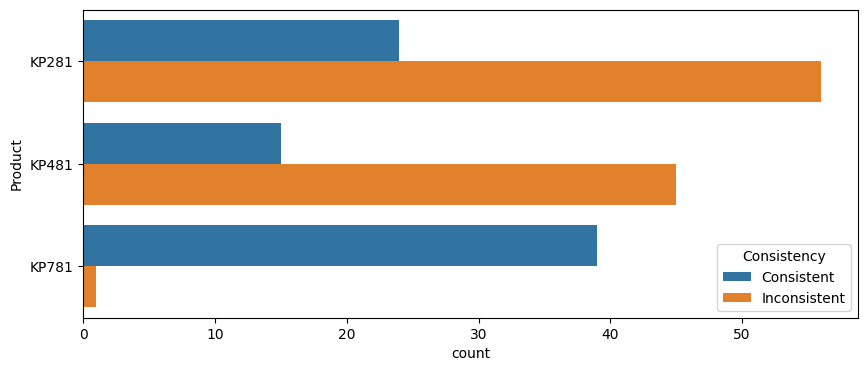

In [610]:
fig= plt.figure(figsize=(10,4))
df_plot= Aerofit_tm_data.groupby(['Consistency','Product'])["Product"].value_counts().reset_index()
df_plot
sns.barplot(x = df_plot["count"], y = df_plot["Product"] ,hue=df_plot["Consistency"])

In [611]:
# Marginal probability
print("Marginal Probablity" )
Marginal_probability = pd.crosstab(
    Aerofit_tm_data['Consistency'], 
    Aerofit_tm_data['Product'], 
    rownames=['Consistency'], 
    colnames=['Products'],
    normalize=True,
    margins=True
    
).style.format('{:.2%}')
display(Marginal_probability)

# Conditional probability
print("Conditional Probablity: P(Consistency|Product)" )
Activity_given_product= pd.crosstab(
    Aerofit_tm_data['Consistency'], 
    Aerofit_tm_data['Product'], 
    rownames=['Consistency'], 
    colnames=['Products'],
    normalize='columns',
).style.format('{:.2%}')
display(Activity_given_product)
print("Conditional Probablity: P(Product|Consistency)" )
Product_given_activity=pd.crosstab(
    Aerofit_tm_data['Consistency'], 
    Aerofit_tm_data['Product'], 
    rownames=['Consistency'], 
    colnames=['Products'],
    normalize='index',

).style.format('{:.2%}')
display(Product_given_activity)


Marginal Probablity


Products,KP281,KP481,KP781,All
Consistency,,,,
Consistent,13.33%,8.33%,21.67%,43.33%
Inconsistent,31.11%,25.00%,0.56%,56.67%
All,44.44%,33.33%,22.22%,100.00%


Conditional Probablity: P(Consistency|Product)


Products,KP281,KP481,KP781
Consistency,,,
Consistent,30.00%,25.00%,97.50%
Inconsistent,70.00%,75.00%,2.50%


Conditional Probablity: P(Product|Consistency)


Products,KP281,KP481,KP781
Consistency,,,
Consistent,30.77%,19.23%,50.00%
Inconsistent,54.90%,44.12%,0.98%


### Observations (Consistency):
* As Observed people buying "KP781" seems to plan to be more consistent (97.5% of them) as compared to other two models.
* KP281 seems to be taken by people who expect to use it less often (30% of them)

# Conclusion (Customer Profiles)

### KP281
* Non active, not consistent, Lower Income with (average to low) fitness prefer KP281.

### KP781
* Active, Highly consistent, Higher income and extremelly fit prefer KP781.

### KP481
* Non Active, Not consistent, Average income and average fit prefer KP481.

Summary of customer profiles for each of the products:
### KP281

* Non active, not consistent, Lower Income with (average to low) fitness prefer KP281.



### KP781

* Active, Highly consistent, Higher income and extremely fit prefer KP781.



### KP481

* Non Active, Not consistent, Average income and average fit prefer KP481.





General Insights and observations:

* The number of times most customer plan to use the treadmill is 3 times per week.

* Age 25 wants to buy a treadmill the most

* Most rate themselves 3 in fitness, very few rate 1

* More males want to buy treadmills than females

* The number of miles the customer expects to walk/run each week is mostly 85 for most people 

* The customers having educational years  14,16,18 want to buy a treadmill the most, others rarely buy.

* The income where most people lie (highest density)appears to be between 35k and 60k dollars

* The miles most people expect to log is between 50 to 110

* Age 22-35 is the most interested to get a treadmill

* There are more partnered people buying a treadmill more than singles

* As we see miles fitness are highly correlated. People who expect to use the treadmill more are fit and plan to log more miles.

* Education years have the least correlation with usage

* Usage and fitness are not correlated. A less fit might use the treadmill more than highly fit person too

* age has no correlation with fitness, usage and miles

* People around the age 22-28 buy treadmills the most

* Education around 14-16 years mostly buy KP281 whereas with 18 years of education people opt for KP781

* KP781 is considered by males more than females

Product specific Insights and observations:

# Fitness Level

* People with low or poor fitness only prefer 'KP281' and 'KP481' models (53.57% and 40.21% ) respectively

* People with low or poor fitness don't even consider the other expensive option like ('KP781')

* People with high fitness prefer 'KP781' model the most as compared to non fit and just fit people. (65.45%) 

* 'KP281','KP481' seems to be a popular model among people who rate themselves to moderately Fit or Not fit.

# Income status

* People who are rich go for 'KP781' more than other to Income_Status people (64% of the Rich population)

* Middle class opt for all 3 products but prefer "KP281" and "KP481" more (87.8% of the middle class population prefer these 2 products)

* Poor class usually opt for "KP281" the most and also "KP481" sometimes (66% and 33.3%) respectively.

* Poor class never opt for "KP781" 

* People with income greater than 70000 only prefer KP781

* People having an income of 45000 to 75000 prefer KP481 and KP281 with slightly higher preference for KP481


# Consistency

* As Observed people buying "KP781" seems to plan to be more consistent (97.5% of them) as compared to other two models.

* KP281 seems to be taken by people who expect to use it less often (30% of them)

* KP781 have few people who plan on using it all 7 days of the week

# Miles Activity

* Non active people almost never opt for "KP781" 

* "Active" people are ready to invest more and buy "KP781" (From P(Product|Miles_Activity))

* "KP781" product is mostly bought by Active people (From P(Miles_Activity|Product))

* KP281 still stands to be the most preferred option among Non active people followed by KP481





